## Reading IMOCAP Dataset From my drive you can easy download it from this link
[IMOCAP](https://drive.google.com/file/d/1GQcZXuIIlezTXmTU5EumT896pCr_qtJ3/view)

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')

!cp '/content/gdrive/My Drive/IEMOCAP.tar' 
!tar -xvf  '/content/gdrive/My Drive/IEMOCAP.tar' 


Streaming output truncated to the last 5000 lines.
IEMOCAP/Session3/EmoEvaluation/Self-evaluation/Ses03F_impro04_m3_atr.txt
IEMOCAP/Session3/EmoEvaluation/Self-evaluation/Ses03F_impro01_m3_atr.txt
IEMOCAP/Session3/EmoEvaluation/Self-evaluation/Ses03M_impro08a_f3_atr.txt
IEMOCAP/Session3/EmoEvaluation/Self-evaluation/Ses03F_impro07_m3_atr.txt
IEMOCAP/Session3/EmoEvaluation/Self-evaluation/Ses03M_impro08a_m3.anvil
IEMOCAP/Session3/EmoEvaluation/Self-evaluation/Ses03F_impro03_m3_cat.txt
IEMOCAP/Session3/EmoEvaluation/Self-evaluation/Ses03F_impro06_m3_cat.txt
IEMOCAP/Session3/EmoEvaluation/Self-evaluation/Ses03M_impro04_f3_cat.txt
IEMOCAP/Session3/EmoEvaluation/Self-evaluation/Ses03F_impro05_m3_cat.txt
IEMOCAP/Session3/EmoEvaluation/Self-evaluation/Ses03F_impro01_m3.anvil
IEMOCAP/Session3/EmoEvaluation/Self-evaluation/Ses03F_impro04_f3.anvil
IEMOCAP/Session3/EmoEvaluation/Self-evaluation/Ses03M_impro07_f3_atr.txt
IEMOCAP/Session3/EmoEvaluation/Self-evaluation/Ses03F_impro05_f3_atr.txt
IEMO

## Reading dataset wav files and labeling them

In [ ]:
# Feel free to uncomment this part of code
'''
import os
import numpy as np
from random import shuffle
from tqdm import tqdm
import librosa
import librosa.display
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split




#emotions_used = np.array(['ang', 'exc', 'neu', 'sad'])
emotions_used=[ 'ang' ,'exc',  'fru','hap','neu', 'sad']
emo_set=dict()
set_emo=set()


data_path = "./IEMOCAP"
sessions = ['Session1', 'Session2', 'Session3', 'Session4', 'Session5']
data_1D = []
data_2D = []



def read_emotion_file(f,sound_dir):

    for indx in range(len(f)):
        if(f[indx]=='' and indx+2<len(f)):
           emo= f[indx+1].split('\t')
           #emo=emo.split(';')[0]

           for i in range(3,9):

             #print(f[indx + i])
             global take
             if (f[indx + i][0] == 'A'):

                break
             s=f[indx+i].split('\t')[1:]
             c=f[indx+(i-1)].split('\t')[1:]
             if c==s:

                take=True
             elif c!=s:

                take = False
                break
           indx+=i
           if take and emo[2] in emotions_used:
               #set_emo.add(emo[2])
               #print(indx ,emo[1])
               i = emotions_used.index(emo[2])
               lab = np.zeros(6)
               lab[i]=1
               if emo[2] not in emo_set:
                   emo_set[emo[2]]=0
               emo_set[emo[2]]+=1
              
               music = os.path.join(sound_dir, emo[1]+".wav")
               sound, s = librosa.load(music, sr=16000, duration=8.0)  # Downsample 44.1kHz to 16kHz  
               #sound=sound-np.mean(sound)             
               sound = librosa.util.pad_center(sound, 128000, mode="symmetric")
               #sound = np.array([x if x else 5 for x in sound ])
               data_1D.append([sound,music, lab])


for session in sessions:
    path_wav = data_path +'/'+session+'/wav/'
    path_emotion=data_path +'/'+session+'/EmoEvaluation/'
    #print(os.path.exists(path_emotion))

    for file in tqdm(os.listdir(path_wav)):
        musics = os.path.join(path_wav, file)
        emotion=os.path.join(path_emotion, file+'.txt')
       
        f = open(emotion, 'r').read()
        f = np.array(f.split('\n'))
        lable_file=read_emotion_file(f,musics)
   
print(emo_set)

'''




100%|██████████| 31/31 [01:12<00:00,  2.33s/it]

{'fru': 412, 'ang': 303, 'sad': 288, 'hap': 60, 'neu': 330, 'exc': 213}


## Some kind of Data Augmentation that make a huge different in accuracy
Generate new audio data by adding noises randomly

In [ ]:
# Data Augmentation for Audio

import librosa
import numpy as np

def noise_adder(data):
    noise_factor = 0.005*np.random.uniform()*np.amax(data)  
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data
'''

def pitch_shift(data):

    sampling_rate =  4 * 2*(np.random.uniform()-0.5)   
    return librosa.effects.pitch_shift(data,sr=16000,  n_steps=sampling_rate, bins_per_octave=24)

def change_speed(data):
    speed_factor = np.random.uniform(low=0.9,high=1.1)
    return librosa.effects.time_stretch(data, speed_factor)

def shift_data(data):
    shift= 0.2 *2*(np.random.uniform()-0.5)  # up to 20% of length
   # shift = np.random.randint(sampling_rate * shift_max)
   
    direction = np.random.randint(0, 2)
    if direction == 1:
        shift = -shift    
    augmented_data = np.roll(data, shift)
    # Set to silence for heading/ tailing
    if shift > 0:
        augmented_data[:shift] = 0
    else:
        augmented_data[shift:] = 0
    return augmented_data


def change_speed_pitch(data):
  return pitch_shift(change_speed(data))
'''

'\n\ndef pitch_shift(data):\n\n    sampling_rate =  4 * 2*(np.random.uniform()-0.5)   \n    return librosa.effects.pitch_shift(data,sr=16000,  n_steps=sampling_rate, bins_per_octave=24)\n\ndef change_speed(data):\n    speed_factor = np.random.uniform(low=0.9,high=1.1)\n    return librosa.effects.time_stretch(data, speed_factor)\n\ndef shift_data(data):\n    shift= 0.2 *2*(np.random.uniform()-0.5)  # up to 20% of length\n   # shift = np.random.randint(sampling_rate * shift_max)\n   \n    direction = np.random.randint(0, 2)\n    if direction == 1:\n        shift = -shift    \n    augmented_data = np.roll(data, shift)\n    # Set to silence for heading/ tailing\n    if shift > 0:\n        augmented_data[:shift] = 0\n    else:\n        augmented_data[shift:] = 0\n    return augmented_data\n\n\ndef change_speed_pitch(data):\n  return pitch_shift(change_speed(data))\n'

## Load from my drive after preprocessing

In [ ]:
import numpy as np
from tqdm import tqdm
import librosa
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import applications
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import *
from keras import backend as k
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.models import load_model
from sklearn.model_selection import StratifiedKFold

#import kapre
#from kapre.time_frequency import Melspectrogram
#from kapre.utils import Normalization2D
import numpy as np 
from google.colab import drive
drive.mount('/content/gdrive')

#np.save('/content/gdrive/My Drive/1D_data_paths.npy', data_1D)
data_1D=np.load('/content/gdrive/My Drive/1D_data_paths.npy', allow_pickle=True)
print(len(data_1D))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
1606


In [ ]:
#!mv /content/11D_data.npy /content/gdrive/My\ Drive

In [ ]:
data1Daug=[]
for i in data_1D:  
    data1Daug.append(i)   
    dd=noise_adder(i[0])
    data1Daug.append([dd,i[1],i[2]])   
    dd=noise_adder(i[0])
    data1Daug.append([dd,i[1],i[2]])   
    dd=noise_adder(i[0])
    data1Daug.append([dd,i[1],i[2]])   
print(len(data_1D))
print(len(data1Daug))

1606
6424


In [ ]:
X_train_1D = [[i[0],i[1]]for i in data1Daug]

target = [i[2] for i in data1Daug]

print(X_train_1D[0][1] )
print(target[0] )
data1Daug=[]


./IEMOCAP/Session1/wav/Ses01M_impro02/Ses01M_impro02_M009.wav
[0. 0. 0. 0. 0. 1.]


In [ ]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_1D, target, test_size=0.20 ,random_state=42,stratify=target)

print(X_train1[0])
print(y_train1[0])
print(X_test1[0])
print(y_test1[0])
print(y_test1[0].argmax())

[array([-0.0229996 , -0.02202684, -0.02477988, ...,  0.00178656,
        0.00201715,  0.0008937 ], dtype=float32), './IEMOCAP/Session2/wav/Ses02F_script01_1/Ses02F_script01_1_M025.wav']
[1. 0. 0. 0. 0. 0.]
[array([ 0.0220731 ,  0.03156397,  0.03807126, ..., -0.03694755,
       -0.0302585 , -0.02167649], dtype=float32), './IEMOCAP/Session4/wav/Ses04M_impro01/Ses04M_impro01_M019.wav']
[0. 0. 1. 0. 0. 0.]
2


In [ ]:
#!rm -r Test_imocap/
#!rm -r IEMOCAP/

## Just make sure every thing is work paths and labels 

In [ ]:
import os
import shutil
'''
import os

# Move a file by renaming it's path
os.rename('/Users/billy/d1/xfile.txt', '/Users/billy/d2/xfile.txt')

# Move a file from the directory d1 to d2
shutil.move('/Users/billy/d1/xfile.txt', '/Users/billy/d2/xfile.txt')
'''

emotions_files=[ 'angry' ,'excited',  'frustrated','happy','neuture', 'sad']
ss=set()
for i in range(len(X_train1)):
    file_name=y_train1[i].argmax()
    ss.add( X_train1[i][1]+'\t'+emotions_files[file_name]+'\n')
   
file1 = open("our_train_data.txt","w+") 
for i in ss:
   file1.write(i)
file1.close() 


ss=set()
#if not os.path.exists('/content/Test_imocap/'):
#        os.mkdir('/content/Test_imocap/')


for i in range(len(X_test1)):
    file_name=y_test1[i].argmax()
    ss.add( X_test1[i][1]+'\t'+emotions_files[file_name])
    print( X_test1[i][1]+'\t'+emotions_files[file_name])
print(len(ss))
file1 = open("our_test_data.txt","w+") 
for i in ss:
    #file1.write( i+'\n')
    c=i.split('/')[-1]
    e= i.split('\t')


    file1.write( e[0]+'\t'+e[1]+'\n')
   # if not os.path.exists('/content/Test_imocap/'+e[1]):
    #    os.mkdir('/content/Test_imocap/'+e[1])
   # shutil.move( e[0],'/content/Test_imocap/'+e[1]+'/'+c )

file1.close() 
#!zip -r "/content/Test_imocap.zip" "/content/Test_imocap"


./IEMOCAP/Session4/wav/Ses04M_impro01/Ses04M_impro01_M019.wav	frustrated
./IEMOCAP/Session4/wav/Ses04F_impro07/Ses04F_impro07_F014.wav	excited
./IEMOCAP/Session4/wav/Ses04F_impro04/Ses04F_impro04_F027.wav	frustrated
./IEMOCAP/Session3/wav/Ses03F_script03_2/Ses03F_script03_2_F035.wav	angry
./IEMOCAP/Session4/wav/Ses04M_script02_1/Ses04M_script02_1_F014.wav	neuture
./IEMOCAP/Session2/wav/Ses02F_impro06/Ses02F_impro06_M005.wav	neuture
./IEMOCAP/Session4/wav/Ses04F_impro07/Ses04F_impro07_M073.wav	neuture
./IEMOCAP/Session2/wav/Ses02F_script03_2/Ses02F_script03_2_F042.wav	angry
./IEMOCAP/Session4/wav/Ses04M_script02_1/Ses04M_script02_1_M032.wav	excited
./IEMOCAP/Session4/wav/Ses04M_script02_1/Ses04M_script02_1_M032.wav	excited
./IEMOCAP/Session5/wav/Ses05M_script03_2/Ses05M_script03_2_M044.wav	angry
./IEMOCAP/Session2/wav/Ses02M_impro02/Ses02M_impro02_F007.wav	sad
./IEMOCAP/Session1/wav/Ses01M_script02_1/Ses01M_script02_1_F019.wav	frustrated
./IEMOCAP/Session3/wav/Ses03M_impro02/Ses03M_impr

In [ ]:
!zip -r "/content/Test_imocap.zip" "/content/Test_imocap"
!rm -r Test_imocap/
!rm -r IEMOCAP/

## Extract log mel-spectrogram from audio

In [ ]:

data_2D = []
for i in range(len(X_train1)):
  
    ps = librosa.feature.melspectrogram(y= X_train1[i][0], sr=16000, n_fft=2048, hop_length=512)
    ps_db = librosa.power_to_db(ps**2, ref=np.median)
    #ps_db = np.log(ps)
    #ps_db= ps_db.T   
    ps_db=np.expand_dims( ps_db, axis=2)
    data_2D.append([ps_db,y_train1[i]])
   
   
   
X_train2 = np.array( [i[0] for i in data_2D])
y_train2 = np.array([i[1] for i in data_2D])
#print(X_train_2D.shape)
#######################testing part##########################
data_2D = []

for i in range(len(X_test1)):
  
    ps = librosa.feature.melspectrogram(y= X_test1[i][0], sr=16000, n_fft=2048, hop_length=512)
    ps_db = librosa.power_to_db(ps**2, ref=np.median)
    #ps_db = np.log(ps)
    #ps_db= ps_db.T   
    ps_db=np.expand_dims( ps_db, axis=2)
    data_2D.append([ps_db,y_test1[i]])
   
   
X_test2 = np.array( [i[0] for i in data_2D])
y_test2 = np.array([i[1] for i in data_2D])
data_2D = []


#np.save('/content/gdrive/My Drive/data_2D.npy', data_2D)


## Read preserve data after preprocessing

In [ ]:
#X_train_2D=np.expand_dims(X_train_2D, axis=3)
#print(X_train_2D.shape)
import numpy as np
from tqdm import tqdm
import librosa
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import applications
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import *
from keras import backend as k
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.models import load_model
from sklearn.model_selection import StratifiedKFold
#X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_2D, target, test_size=0.20 ,random_state=None,stratify=target)
import numpy as np 
from google.colab import drive
drive.mount('/content/gdrive')
#print(X_train2.shape)
#print(X_test2.shape)
#print(y_train2.shape)
#print(y_test2.shape)
#np.save('/content/gdrive/My Drive/X_train2.npy', X_train2)
#np.save('/content/gdrive/My Drive/X_test2.npy', X_test2)
#np.save('/content/gdrive/My Drive/y_train2.npy', y_train2)
#np.save('/content/gdrive/My Drive/y_test2.npy', y_test2)
X_train2=np.load('/content/gdrive/My Drive/X_train2.npy', allow_pickle=True)
y_train2=np.load('/content/gdrive/My Drive/y_train2.npy', allow_pickle=True)
X_test2=np.load('/content/gdrive/My Drive/X_test2.npy', allow_pickle=True)
y_test2=np.load('/content/gdrive/My Drive/y_test2.npy', allow_pickle=True)


#print(X_train_2D.shape)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
print(X_train2.shape)

(5139, 128, 251, 1)


## Model Architecture

In [ ]:
from keras import applications
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import *
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras import regularizers
#Input Shape For Example 
def create_model():
  M = 128
  N = 251

  model = Sequential()
  model.add(Conv2D(kernel_size=(3,3), strides=(1,1), filters=64, padding= 'same'  , input_shape= (M,N,1)))
  model.add(BatchNormalization())
  model.add(Activation('elu'))
  model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2) ))
  #model.add(Dropout(0.25))

  model.add(Conv2D(kernel_size=(3,3), strides=(1,1), filters=64, padding= 'same' ))
  model.add(BatchNormalization())
  model.add(Activation('elu'))
  model.add(MaxPooling2D(pool_size = (4,4), strides = (4,4) ))
  #model.add(Dropout(0.25))

  model.add(Conv2D(kernel_size=(3,3), strides=(1,1), filters=128, padding= 'same'))
  model.add(BatchNormalization())
  model.add(Activation('elu'))
  model.add(MaxPooling2D(pool_size = (4,4), strides = (4,4) ))
  #model.add(Dropout(0.25))

  model.add(Conv2D(kernel_size=(3,3), strides=(1,1), filters=128, padding= 'same' ))
  model.add(BatchNormalization())
  model.add(Activation('elu'))
  model.add(MaxPooling2D(pool_size = (4,4), strides = (4,4) ))
  #model.summary()
  model.add(Reshape(target_shape=( 1,128)))#replace(1,128)
  model.add(LSTM(units= 256))
  #model.add(ConvLSTM2D(filters=256, kernel_size=(3,3),padding='same',data_format="channels_first" ,return_sequences=True))
  model.add(Dense(6))
  model.add(Activation('softmax'))
 # opt = optimizers.SGD(lr = 0.001, decay=1e-6, momentum=0.9, nesterov=True)
    
  model.compile(loss = "categorical_crossentropy", optimizer ='adagrad',metrics=['accuracy'])
  #adagrad
  return model


## Apply cross validation

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
#, random_state=42
cv = KFold(n_splits=10, shuffle=True)
scores=[]
best=0
#cv.split(X_train2) <------------------try this next time
for train_index, test_index in cv.split(X_train2):
    print(train_index)
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)
    mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
    #opt = optimizers.SGD(lr = 0.001, decay=1e-6, momentum=0.9, nesterov=True)
    
    X_train, X_test, y_train, y_test = X_train2[train_index], X_train2[test_index], y_train2[train_index], y_train2[test_index]  
    model=create_model()
    #batch_size=32 modifing
    his=model.fit(X_train, y_train,epochs=60,batch_size=32,validation_data=( X_test,y_test),callbacks=[mc,es])
    saved_model = load_model('best_model.h5')
    score =  saved_model.evaluate(X_test, y_test, verbose=0)
    scores.append(score[1] )
    if(scores[-1]>best):
      best=scores[-1]
      saved_model.save('my_model.h5') 
      history=his
   


[   0    1    3 ... 5136 5137 5138]
Epoch 1/60
145/145 [==============================] - ETA: 0s - loss: 1.6697 - accuracy: 0.2919
Epoch 00001: val_accuracy improved from -inf to 0.26848, saving model to best_model.h5
145/145 [==============================] - 10s 66ms/step - loss: 1.6697 - accuracy: 0.2919 - val_loss: 1.6348 - val_accuracy: 0.2685
Epoch 2/60
144/145 [============================>.] - ETA: 0s - loss: 1.5305 - accuracy: 0.4275
Epoch 00002: val_accuracy improved from 0.26848 to 0.42996, saving model to best_model.h5
145/145 [==============================] - 9s 60ms/step - loss: 1.5301 - accuracy: 0.4279 - val_loss: 1.5221 - val_accuracy: 0.4300
Epoch 3/60
144/145 [============================>.] - ETA: 0s - loss: 1.4433 - accuracy: 0.4740
Epoch 00003: val_accuracy improved from 0.42996 to 0.46693, saving model to best_model.h5
145/145 [==============================] - 9s 60ms/step - loss: 1.4441 - accuracy: 0.4739 - val_loss: 1.4432 - val_accuracy: 0.4669
Epoch 4/60
1

## Model Evaluation

10
validation
0.986183375120163


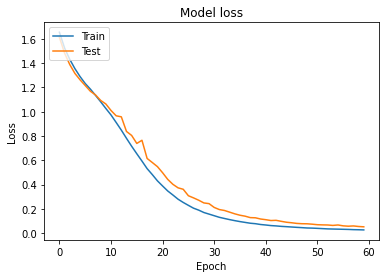

In [ ]:
print(len(scores))
print('validation')
print(np.mean(scores))
from keras.utils import plot_model
plot_model(saved_model, to_file='model.png')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


print([ 'ang' ,'exc',  'fru','hap','neu', 'sad'])




model=create_model()

model.fit(X_train2, y_train2,epochs=49,batch_size=32)#11 epochs
model.save('my_modeltry2.h5') 


saved_model = load_model('my_modeltry2.h5')
prediction = saved_model.predict(X_test2)
 #batch_size=32 modifing

test=saved_model.evaluate( X_test2,  y_test2,batch_size=32)
print('test')
print(test)
print('test matrix')
x=confusion_matrix(y_test2.argmax(axis=1),prediction.argmax(axis=1),labels=[0,1,2,3,4,5])
print(x)
 #batch_size=32 modifing
train=saved_model.evaluate( X_train2,  y_train2,batch_size=32)
print('train')
print(train)
prediction = saved_model.predict(X_train2)
x=confusion_matrix(y_train2.argmax(axis=1),prediction.argmax(axis=1),labels=[0,1,2,3,4,5])
print(x)




print(X_test2.shape)




In [ ]:
#!cp /content/my_modeltry2.h5 /content/gdrive/My\ Drive/
#!mv /content/Test_imocap.zip /content/gdrive/My\ Drive/
#!mv /content/our_train_data.txt /content/gdrive/My\ Drive/
#!mv /content/our_test_data.txt /content/gdrive/My\ Drive/

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

saved_model = load_model('/content/gdrive/My Drive/my_modeltry2.h5')
prediction = saved_model.predict(X_test2)
 #batch_size=32 modifing

test=saved_model.evaluate( X_test2,  y_test2,batch_size=32)
print('test')
print(test)
print('test matrix')
x=confusion_matrix(y_test2.argmax(axis=1),prediction.argmax(axis=1),labels=[0,1,2,3,4,5])
print(x)
 #batch_size=32 modifing
train=saved_model.evaluate( X_train2,  y_train2,batch_size=32)
print('train')
print(train)
prediction = saved_model.predict(X_train2)
x=confusion_matrix(y_train2.argmax(axis=1),prediction.argmax(axis=1),labels=[0,1,2,3,4,5])
print(x)



41/41 [==============================] - 1s 18ms/step - loss: 0.0659 - accuracy: 0.9953
test
[0.06590099632740021, 0.9953307509422302]
test matrix
[[243   0   0   0   0   0]
 [  0 170   0   0   0   0]
 [  0   0 330   0   0   0]
 [  0   0   0  43   0   5]
 [  0   0   0   0 263   1]
 [  0   0   0   0   0 230]]
161/161 [==============================] - 3s 19ms/step - loss: 0.0329 - accuracy: 1.0000
train
[0.03294673189520836, 1.0]
[[ 969    0    0    0    0    0]
 [   0  682    0    0    0    0]
 [   0    0 1318    0    0    0]
 [   0    0    0  192    0    0]
 [   0    0    0    0 1056    0]
 [   0    0    0    0    0  922]]
